In [1]:
import pandas as pd
import warnings 

warnings.filterwarnings("ignore")

test = pd.read_csv('test.csv')
dataset = pd.read_csv('train.csv')
 


In [2]:
print(dataset.head(3))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [3]:
#have some general informations abour out data set 
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# making a copy of our data to work with 
copied_data = dataset.copy() 

""""first of all from what we've seen, there are some columns which are not usefull to help us predict the survival 
like PassengerId, Name, Ticket and cabin because it contains a lot of missing data so let's drop them """
copied_data = copied_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print(copied_data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


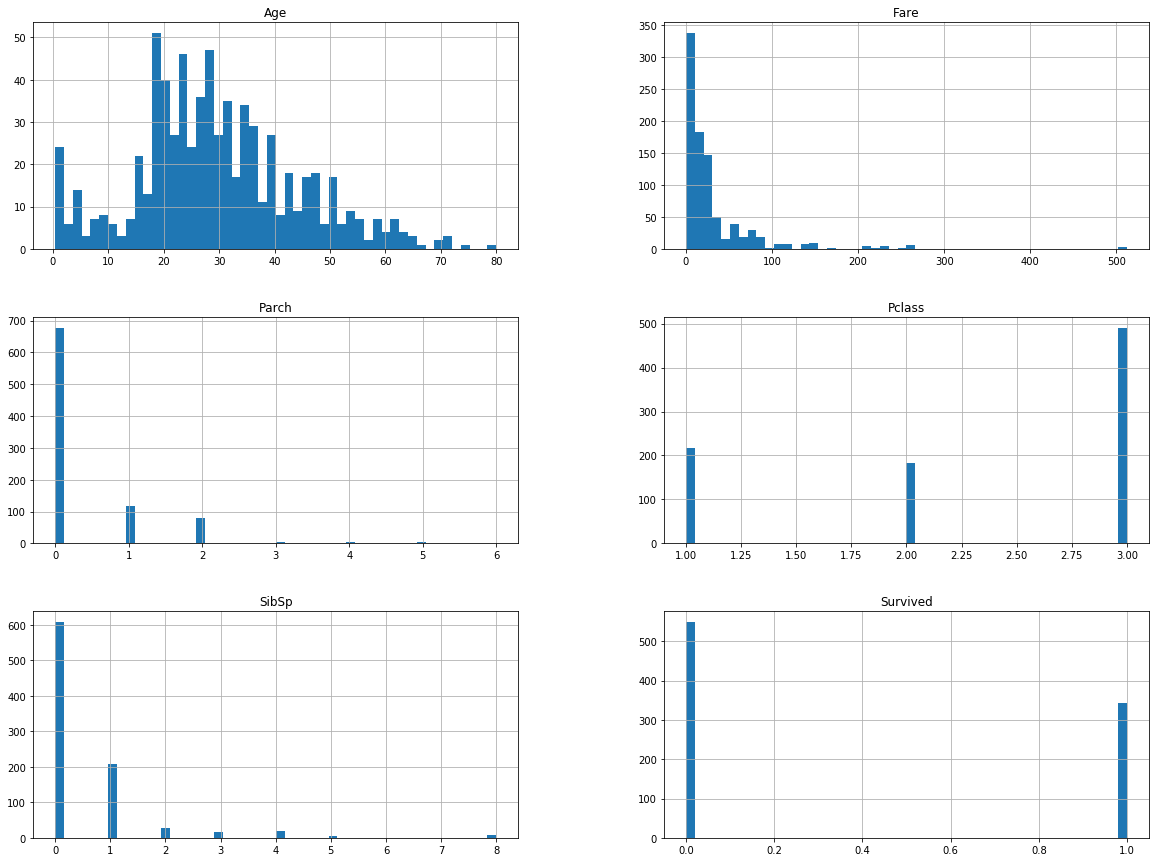

In [5]:

import matplotlib.pyplot as plt 

copied_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
# a lot of passengers were alone, majority of the passengers are in the 3rd class 

print(copied_data['Parch'].count())
#let's define some useful functions 

def get_attr(object_name, attribute):
    return getattr(object_name, attribute)

def featureSurvival(data, feature):
    
    dict_data = {'Survived':get_attr(data, feature).loc[data.Survived == 1], 'Dead':get_attr(data, feature)
                .loc[data.Survived == 0]}
    data_plot = pd.DataFrame(dict_data)
    histogram = data_plot.plot.hist(bins=50, alpha= 0.5)
    plt.xlabel(feature)
    plt.show()

891


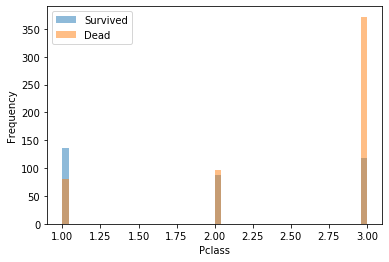

In [7]:
featureSurvival(copied_data, 'Pclass')
#we will define a feature called is child : 1 if the age is 8 or less, 0 otherwise 

In [8]:
def corrMatrix(data, feature):
    corr_matrix = data.corr()
    return corr_matrix[feature]

print(corrMatrix(copied_data, 'Survived'))

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64


In [9]:
#adding a new feature
copied_data['Family'] = copied_data['SibSp'] + copied_data['Parch']
print(corrMatrix(copied_data, 'Fare'))

Survived    0.257307
Pclass     -0.549500
Age         0.096067
SibSp       0.159651
Parch       0.216225
Fare        1.000000
Family      0.217138
Name: Fare, dtype: float64


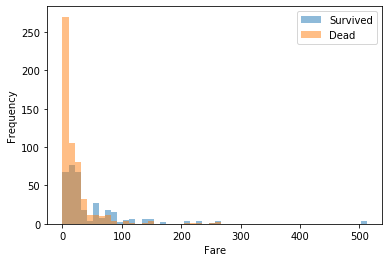

In [10]:
featureSurvival(copied_data, 'Fare')

In [11]:
print(copied_data['Fare'].groupby(copied_data.Pclass).value_counts())
print(copied_data.loc[(copied_data.Fare >= 50) & (copied_data.Fare <= 100)])

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: Fare, Length: 255, dtype: int64
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Family
1           1       1  female  38.0      1      0  71.2833        C       1
3           1       1  female  35.0      1      0  53.1000        S       1
6           0       1    male  54.0      0      0  51.8625        S       0
34          0       1    male  28.0      1      0  82.1708        C       1
35          0       1    male  42.0      1      0  52.0000        S       1
..        ...     ...     ...   ...    ...    ...      ...      ...     ...
849         1       1  female   NaN      1      0  89.1042        C       1
863         0       3  female   NaN      8      2  69.5500        S      10
867         0       

In [12]:
print(copied_data.Fare.describe()) 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [13]:
copied_data['p_fare'] = copied_data['Fare'] / copied_data['Family']
import numpy as np 

copied_data['is_child'] = np.where(copied_data.Age <=8, 1, 0)

In [14]:
#data loading
labels = dataset['Survived']
print(labels.isnull().sum())
transformed_features = dataset.drop('Survived', axis=1)

0


In [15]:
#preparing the data

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer


class DropFeature(BaseEstimator, TransformerMixin):
    
    def __init__(self, drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']):
        self.drop = drop_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.drop, axis=1)

class AddFeature(BaseEstimator, TransformerMixin):
    
    def __init__(self, family=True, is_child=True, p_fare=True):
        self.family = family 
        self.is_child = is_child 
        self.p_fare = p_fare 
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        if self.family:
            family = X['Parch'] + X['SibSp']
            X['family'] = family 
        
        if self.is_child:
            X['is_child'] = np.where(X.Age <=8, 1, 0)
        
        if self.p_fare and self.family:
            p_fare = X['Fare'] / (X['family'] + 1 )
            X['p_fare'] = p_fare 
        
        return X
    
class CategoryEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, sex=True, embarked=True):
        self.sex = sex 
        self.embarked = embarked 
        
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        
        encoder = LabelBinarizer()
        if self.sex:
            sex = X['Sex']
            encoded_sex = encoder.fit_transform(sex)
            X['Sex'] = encoded_sex
        
        if self.embarked:
            embarked = X['Embarked'].fillna('C')
            encoded_embarked = encoder.fit_transform(embarked)
            X['Embarked'] = encoded_embarked 
        
        return X    
            
    

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split


pipeline = Pipeline([
    ('dropper', DropFeature()),
    ('encoder', CategoryEncoder()),
    ('adder', AddFeature()),
    ('imputer', SimpleImputer(strategy="mean"))
])

training_data = pipeline.fit_transform(transformed_features)
print(type(training_data))
print(training_data.shape)

<class 'numpy.ndarray'>
(891, 10)


In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

log = LogisticRegression()
log.fit(training_data, labels)
scores = cross_val_score(log, training_data, labels, scoring = 'accuracy', cv = 10)
print(scores.mean())
 

0.8103495630461923


In [18]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
forest.fit(training_data, labels)
forest_scores = cross_val_score(forest, training_data, labels, scoring='accuracy', cv=10)
print(forest_scores.mean())


0.800287141073658


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, training_data, labels, scoring='accuracy', cv=10)
print(scores.mean())

0.800287141073658


In [20]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree.fit(training_data, labels)

tree_scores = cross_val_score(tree, training_data, labels, scoring = 'accuracy', cv = 10)
print(tree_scores.mean())

0.7868414481897628


# Fine-Tune the model 
So i decided to pick the RandomForestClassifier . Let's try to improve its accuracy. 


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

import warnings
warnings.filterwarnings("ignore")
    
grid_search = GridSearchCV(forest, param_grid, cv=5,scoring='accuracy')
grid_search.fit(training_data, labels)
cv_results = grid_search.cv_results_

print(grid_search.best_params_)

{'max_features': 4, 'n_estimators': 10}


In [22]:
for key in cv_results.keys():
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_features
param_n_estimators
param_bootstrap
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [23]:
for score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print('SCORE  :', score, 'PARAMS  :', params)

SCORE  : 0.7834410896993284 PARAMS  : {'max_features': 2, 'n_estimators': 3}
SCORE  : 0.7991212102190698 PARAMS  : {'max_features': 2, 'n_estimators': 10}
SCORE  : 0.8047580189567508 PARAMS  : {'max_features': 2, 'n_estimators': 30}
SCORE  : 0.8047266336074321 PARAMS  : {'max_features': 4, 'n_estimators': 3}
SCORE  : 0.8170924612390935 PARAMS  : {'max_features': 4, 'n_estimators': 10}
SCORE  : 0.8092398468394955 PARAMS  : {'max_features': 4, 'n_estimators': 30}
SCORE  : 0.784545853995355 PARAMS  : {'max_features': 6, 'n_estimators': 3}
SCORE  : 0.8047642960266147 PARAMS  : {'max_features': 6, 'n_estimators': 10}
SCORE  : 0.8081162513338773 PARAMS  : {'max_features': 6, 'n_estimators': 30}
SCORE  : 0.7946582135459168 PARAMS  : {'max_features': 8, 'n_estimators': 3}
SCORE  : 0.8002699140041429 PARAMS  : {'max_features': 8, 'n_estimators': 10}
SCORE  : 0.8092335697696316 PARAMS  : {'max_features': 8, 'n_estimators': 30}
SCORE  : 0.7800765802523382 PARAMS  : {'bootstrap': False, 'max_featu